<a href="https://colab.research.google.com/github/maxi9113/colab_notebook/blob/main/IC_Ejercicio_jerarquicio_taller_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Circles

In [ ]:
%pip install scipy

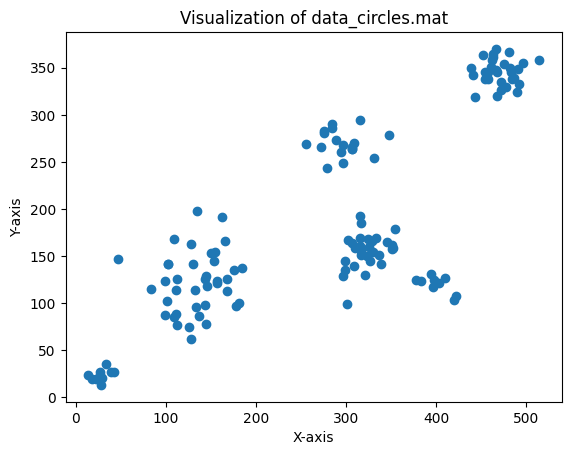

In [ ]:
from scipy.io import loadmat
import matplotlib.pyplot as plt

# Load the .mat file
mat_data = loadmat('/content/drive/MyDrive/Colab Notebooks/Files/data_clusters.mat')
mat_data = mat_data["X"]
# Extract the data (assuming the data is stored in a variable named 'X' and 'Y' in the .mat file)


# Create a scatter plot
plt.scatter(mat_data[:, 0], mat_data[:, 1])
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Visualization of data_clusters.mat')
plt.show()

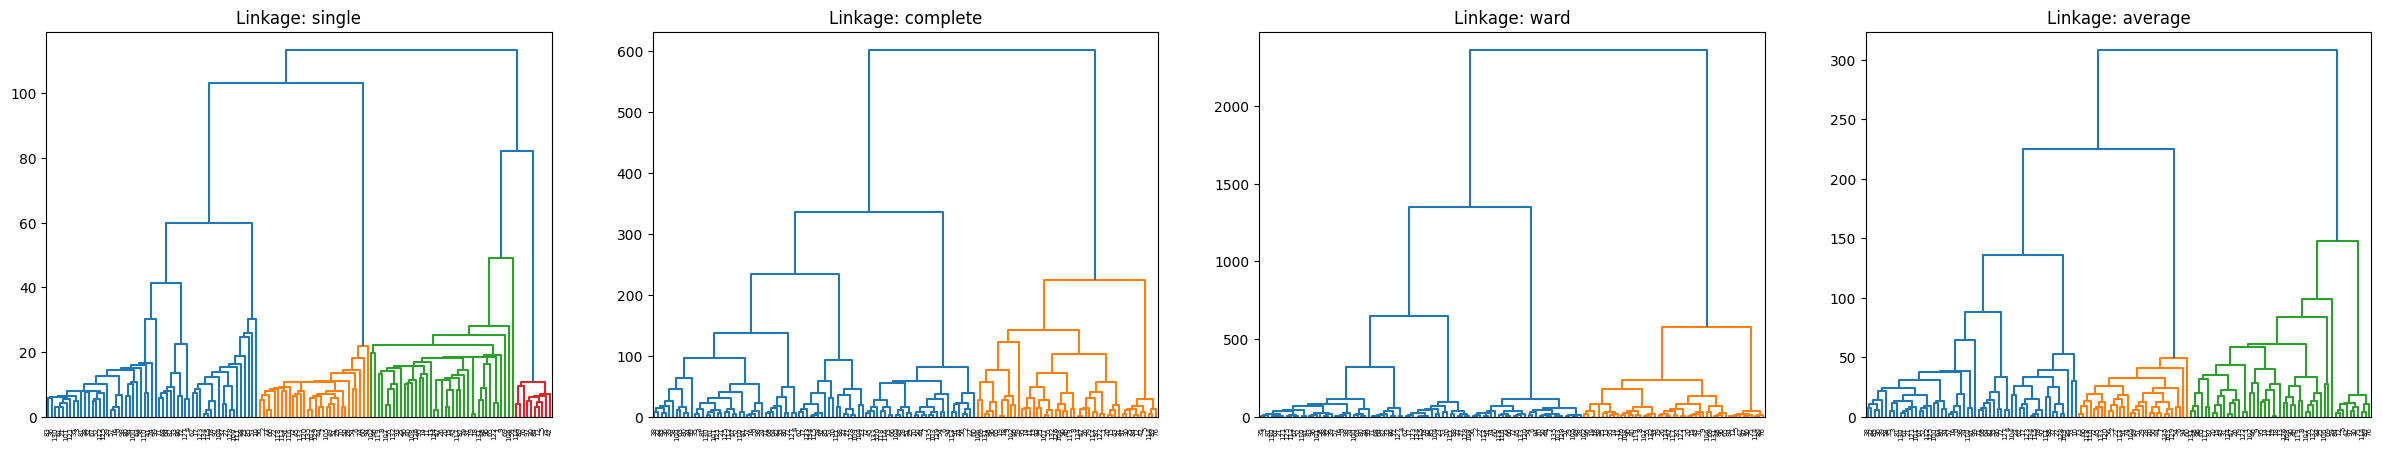

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import numpy as np

# Perform hierarchical clustering
# We use 'ward' linkage which minimizes the variance of the clusters being merged.
# Since X and Y are separate arrays, we need to combine them for clustering.
# Assuming X and Y correspond to the two dimensions of the data points.
# data = mat_data['X'] # Assuming X contains the data points
# If your data has more than one dimension stored in separate arrays, you would combine them like this:
data = np.column_stack((mat_data[:, 0], mat_data[:, 1]))

methods = ['single', 'complete', 'ward', 'average']
linked_method = []

fig, axes = plt.subplots(1, 4, figsize=(30, 5))
for i, method in enumerate(methods):
    linked_clusters = linkage(data, method)
    linked_method.append(linked_clusters)
    dendrogram(linked_clusters,
               orientation='top',
               distance_sort='descending',
               show_leaf_counts=True,
               ax=axes[i])
    axes[i].set_title(f'Linkage: {method}')
plt.show()


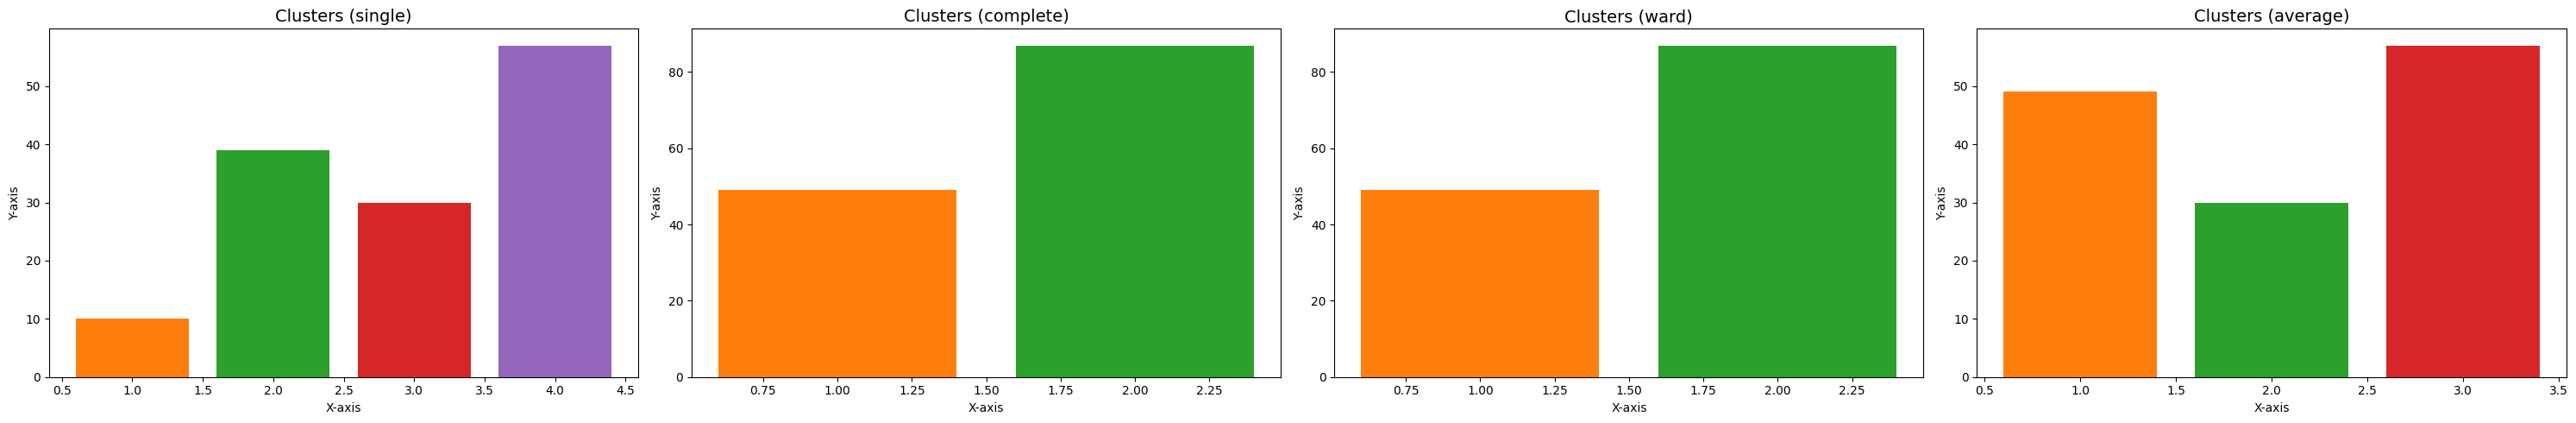

In [ ]:


from scipy.cluster.hierarchy import fcluster
import matplotlib.pyplot as plt
from collections import Counter

# Crear figura con 1 fila y 4 columnas
fig, axes = plt.subplots(1, 4, figsize=(30, 5))

# Número de clusters detectados en cada método
max_d = [4, 2, 2, 3]
methods = ['single', 'complete', 'ward', 'average']

for i, method in enumerate(methods):
    # Obtener clusters con fcluster
    clusters = fcluster(linked_method[i], max_d[i], criterion='maxclust')
    conteo = Counter(clusters)
    colors = plt.cm.tab10.colors

    axes[i].bar(conteo.keys(), conteo.values(),
                color=[colors[c % len(colors)] for c in conteo.keys()])

    # Etiquetas y título
    axes[i].set_title(f'Clusters ({method})', fontsize=14)
    axes[i].set_xlabel('X-axis')
    axes[i].set_ylabel('Y-axis')

plt.tight_layout()
plt.show()
